# Chapter 5: Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [1]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [2]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

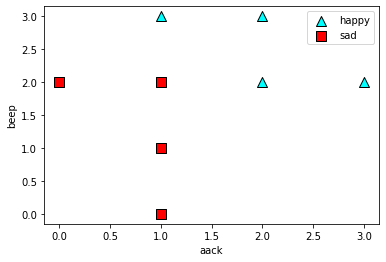

In [3]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### 2a) There are 8 data points. 

### 2b) The number of the appearances of 'aack' is represented by the x-coordinates in the scatter plot. The number of the appearances 'beep' is represented by the y-coordinates in the scatter plot. 

### 3c) In the label array, the sad sentence is represented by a 0 and the happy sentence is represented by a 1. 

### Coding the perceptron trick

In [4]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [5]:
#weights = [1,1]
#bias = -3.5
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(prediction(weights, bias, features[i]), error(weights, bias, features[i], labels[i]))

0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0


In [6]:
# First perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    return weights, bias

In [7]:
# Shorter version of the perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        
    bias += (label-pred)*learning_rate
    return weights, bias

In [8]:
perceptron_trick(weights, bias, features[6], 0)

([0.98, 1.97], -4.01)

### Running the perceptron algorithm

In [9]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

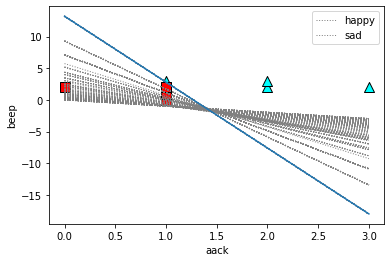

([0.5199999999999996, 0.049999999999999364], -0.6600000000000004)

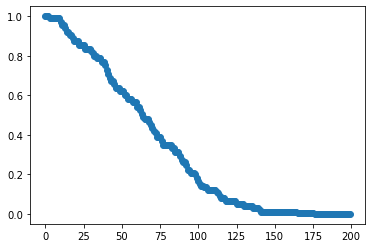

In [10]:
perceptron_algorithm(features, labels)

### 3a) The initial weight is given to the number of 'aacks' is 1, the initial weight is given to the number of 'beeps' is 2. The initial bias is -4. 

### 3b) The learning rate is 0.01. We want to adjust the weights and the bias with a small amount every time the point is incorrectly classified. The purpose of the learning rate is to improve the classifier slightly and then repeat it many times until we have a good perceptron classifier. For example, when the weights of 'aack' and 'beep' are 1 and 2 respectively and the bias is -4. If the prediction is misclassified, where the sentence is 'aack' appear 2 times and 'beep' appear five times. The prediction is 1*2+2*5-4 = 8, which the prediction y_head is equal to 1. However, the correct output should be sad(0) when the number of the appearances 'beep' is higher than the number of the appearances 'aack'. With a learning rate of 0.01, we will reduce the weight of 'aack' to 1-2*0.01 = 0.98, the weight of 'beep' to 2-5*0.01 = 1.95, and the bias to -4 - 0.01 = -4.01. 

### 3c) Epoch is the number of times that we want to repeat the training process. We want to adjust the perceptron line slightly better each time to have a better fit for the points. There are 200 epochs are used in training, which means we adjust slightly 200 times. 

### 3d) After training, the value is assigned to the 'aacks' weight is 0.52, the value is assigned to the 'beeps' is 0.05, and the bias is -0.66. 

### 3e) After training, there are 100% of points have the correct prediction. 

### 3f) The error reaches zero at around epoch 140; therefore, less epochs could have been used to achieve similar performance. The lower the error we will get when more epochs apply. However, when the epoch reaches around 140, the error is very close to zero and becomes a little bit unnecessary to have too much more training after that.

### 3g) We can train models by iterating on one point at a time or on the entire dataset but it could be expensive when we have a large dataset. Stochastic gradient descent is when we train models by iterating on one point at a time. Mini-batch learning is that we can divide data into many mini-batches. In each iteration of the perceptron algorithm, we adjust the weights and reduce the error from that one mini-batch that we pick. The batch gradient descent is when we train models by iterating on the entire dataset. 

### The perceptron algorithm using Turi Create

In [11]:
import turicreate as tc

In [12]:
datadict = {'aack': features[:,0], 'beep':features[:,1], 'prediction': labels}
data = tc.SFrame(datadict)
data

aack,beep,prediction
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
2,3,1
3,2,1


In [13]:
perceptron = tc.logistic_classifier.create(data, target='prediction')

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 1.001690     | 1.000000          |

| 2         | 3        | 1.003299     | 1.000000          |

| 3         | 4        | 1.004569     | 1.000000          |

| 4         | 5        | 1.005860     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [14]:
perceptron.coefficients

name,index,class,value,stderr
(intercept),None,1,-8.959708265685022,6.844844514902377
aack,None,1,2.972553703911967,2.6977310191336046
beep,None,1,2.498635186535742,2.4552961030591502


### 4a) After training, the value is assigned to the 'aacks' weight is 2.97, the value is assigned to the 'beep' weight is 2.49, and the bias is -8.96. These values are different from the values in the "Running the perceptron algorithm" section. 

### 4b) From the training accuracy column, noticed that the training accuracy is 1, which means every point in the dataset was correctly classified so 100% of the points have the correct prediction. Compare with the results from the "Running the perceptron algorithm" section, they have the same result, in which 100% of the points have the correct prediction. 

### 4c) The model uses the Newton Method, and after four epochs, it finds an optimal solution for the weights and bias, where the 'aack' weight is 2.97, the 'beep' weight is 2.49 and the bias is -8.96. The model also indicates with a message "SUCCESS: Optimal solution found." after the perceptron training. 